In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

In [ ]:
df = pd.read_csv('/content/AirPassengers.csv')
print(df.head())
print('\n df Types:')
print(df.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 df Types:
Month          object
#Passengers     int64
dtype: object


In [ ]:
import pandas as pd
from datetime import datetime

dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
df = pd.read_csv('/content/AirPassengers.csv', parse_dates=['Month'],
                 index_col='Month', date_parser=dateparse)
print('\n Parsed df:')
print(df.head())


 Parsed df:
            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


<ipython-input-3-acd2449defde>:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('/content/AirPassengers.csv', parse_dates=['Month'],


In [ ]:
ts = df['#Passengers']
ts.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [ ]:
ts['1949-04-01']

np.int64(129)

In [ ]:
from datetime import datetime
ts[datetime(1949,1,1)]

np.int64(112)

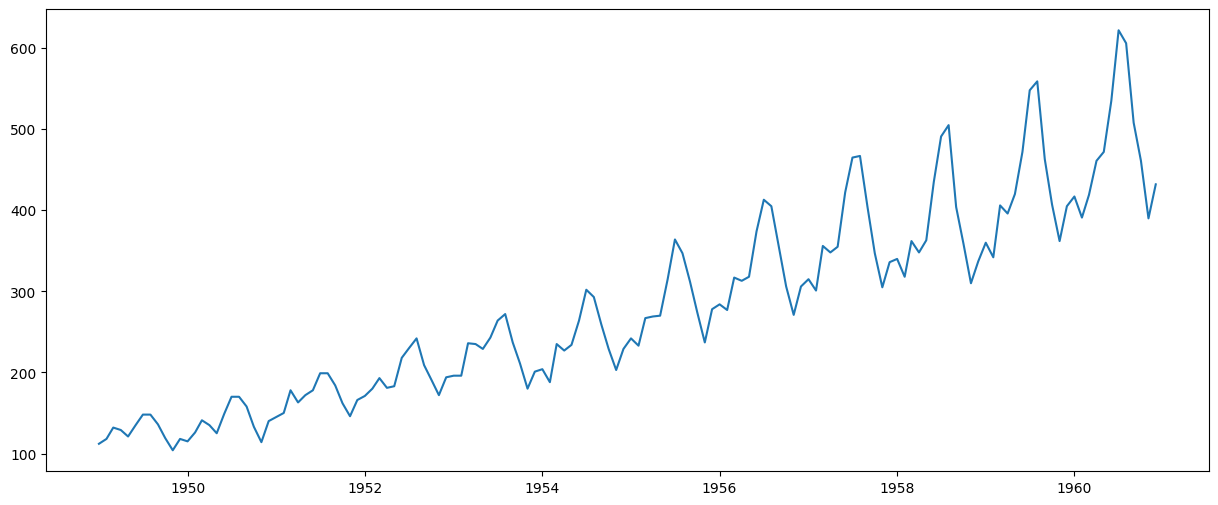

In [ ]:
plt.plot(ts)

In [ ]:
# STATIONARY CHECK
#Ho: TS is non-stationary
#H1: TS is stationary
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = pd.Series (timeseries).rolling(window=12).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Perform Dickey-Fuller test:
    print('Result of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of observation used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
ts

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


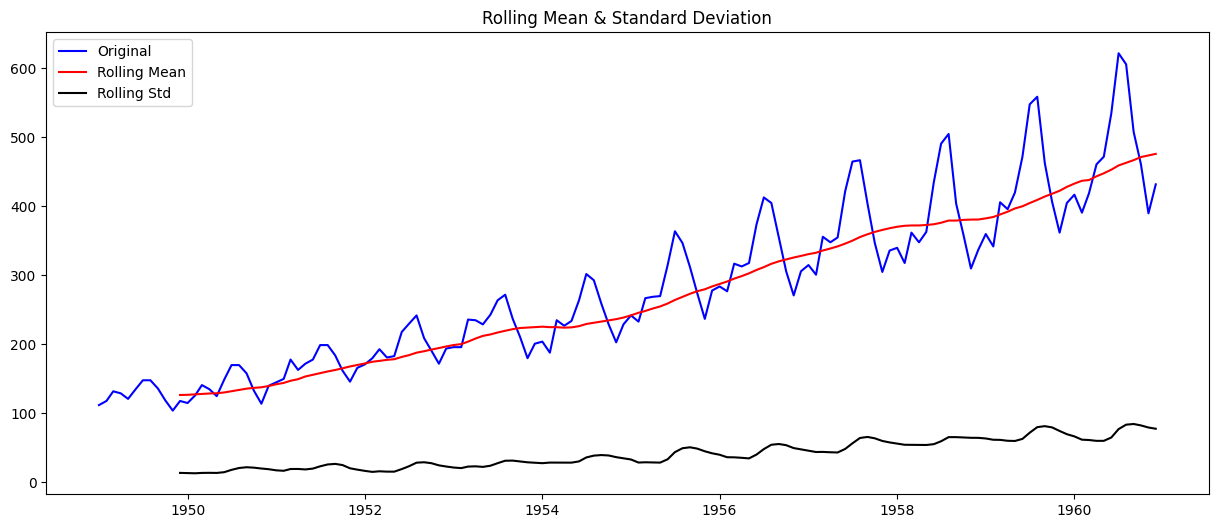

Result of Dickey-Fuller Test:
Test Statistic                  0.815369
p-value                         0.991880
#Lags Used                     13.000000
Number of observation used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


In [ ]:
test_stationarity(ts)

making ts stationary

In [ ]:
ts.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
ts_log = np.log(ts)


In [ ]:
ts_log.head(5)

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


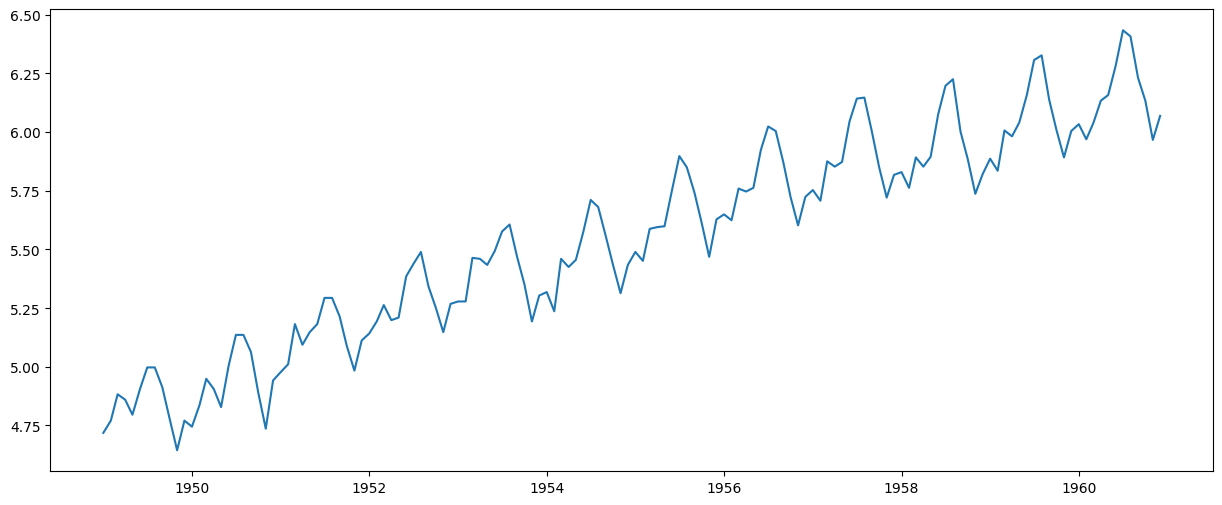

In [ ]:
plt.plot(ts_log)

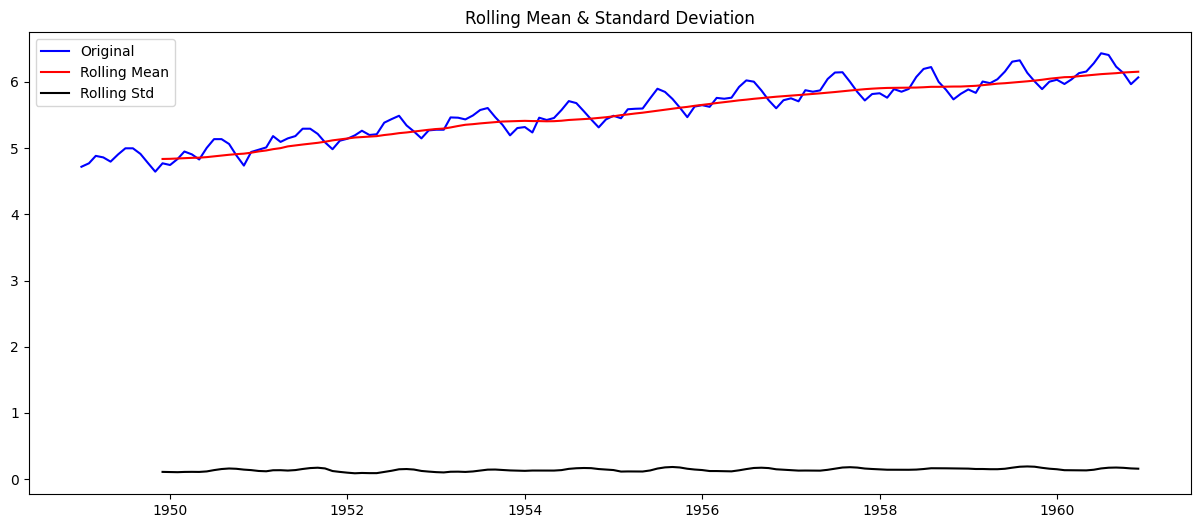

Result of Dickey-Fuller Test:
Test Statistic                 -1.717017
p-value                         0.422367
#Lags Used                     13.000000
Number of observation used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


In [ ]:
test_stationarity(ts_log)

In [ ]:
ts_doublelog = np.log(ts_log)

In [ ]:
ts_doublelog.head(5)

,#Passengers
Month,
1949-01-01,1.551491
1949-02-01,1.562490
1949-03-01,1.585719
1949-04-01,1.581000
1949-05-01,1.567739


In [ ]:
ts_doublelog.tail(5)

,#Passengers
Month,
1960-08-01,1.857372
1960-09-01,1.829454
1960-10-01,1.813749
1960-11-01,1.786101
1960-12-01,1.803099


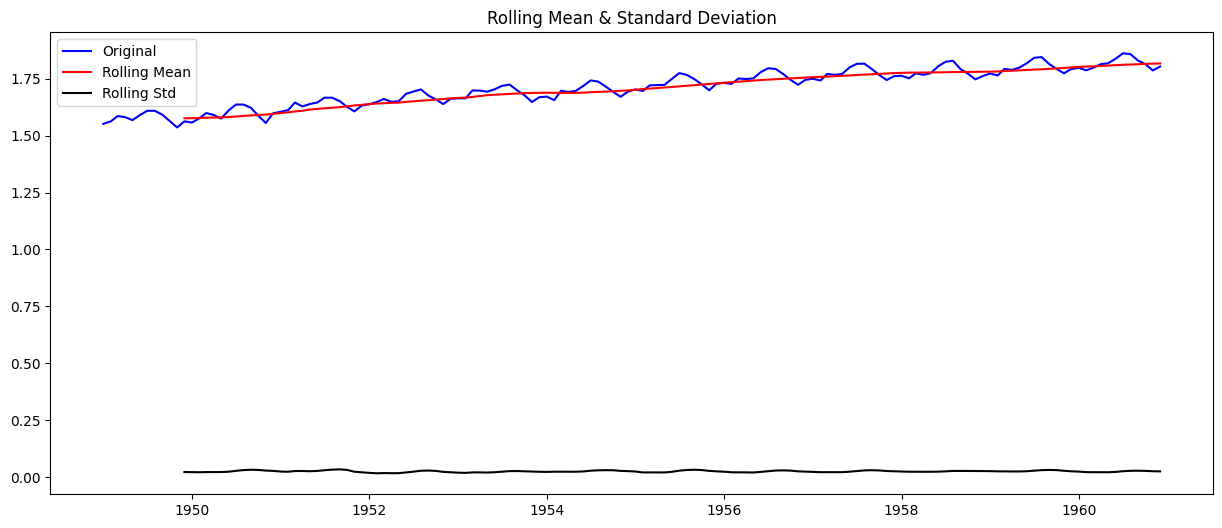

Result of Dickey-Fuller Test:
Test Statistic                 -2.156028
p-value                         0.222590
#Lags Used                     13.000000
Number of observation used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


In [ ]:
test_stationarity(ts_doublelog)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


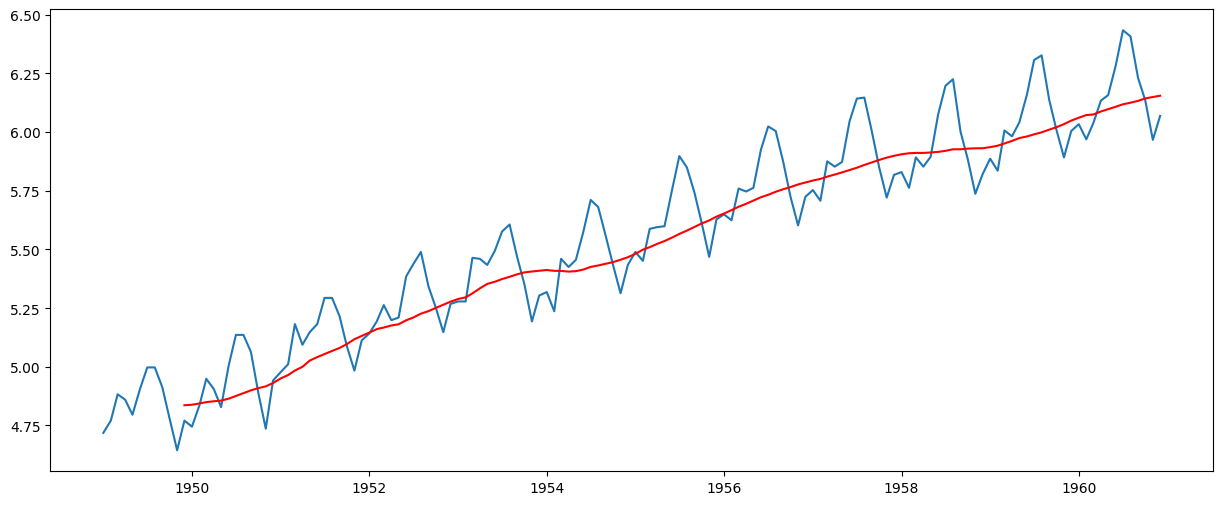

In [ ]:
moving_avg = pd.Series(ts_log).rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(5)

ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head(5)

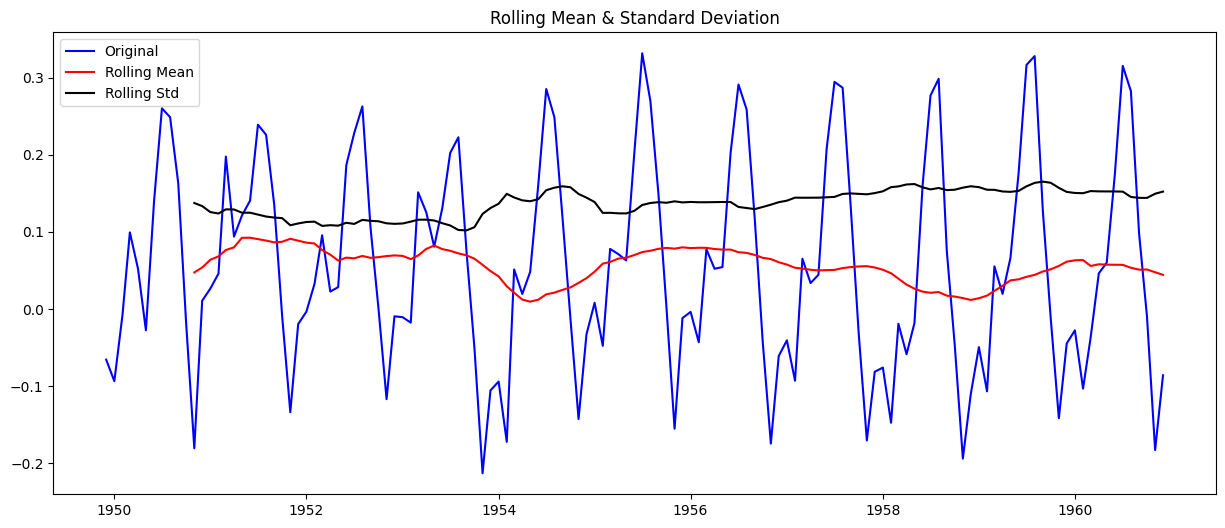

Result of Dickey-Fuller Test:
Test Statistic                 -3.162908
p-value                         0.022235
#Lags Used                     13.000000
Number of observation used    119.000000
Critical Value (1%)            -3.486535
Critical Value (5%)            -2.886151
Critical Value (10%)           -2.579896
dtype: float64


In [ ]:
test_stationarity(ts_log_moving_avg_diff)